In [10]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scipy import signal
from skimage.transform import rescale, resize, downscale_local_mean
import math
import os
from skimage.morphology import binary_erosion, binary_dilation
import cv2 as cv
import cv2 as cv2
 
import numba
from numba import jit

In [3]:
@jit(nopython=True,parallel=True)
def my_resize(img, w, h):
    new_img = np.zeros(shape=(w, h))
    width,height = img.shape
    Xwmin = 0
    Ywmin = 0
    Xwmax = width - 1
    Ywmax = height - 1
    Xvmin = 0
    Yvmin = 0
    Xvmax = w - 1
    Yvmax = h - 1
    Sx = (Xvmax - Xvmin)/(Xwmax - Xwmin)
    Sy = (Yvmax - Yvmin)/(Ywmax - Ywmin)
    for i in range(height):
        new_i = int(Yvmin + (i - Ywmin) * Sy)
        for j in range(width):
            new_j = int(Xvmin + (j - Xwmin) * Sx)
            new_img[new_j][new_i] = img[j][i]
    return new_img      



# image = cv2.imread('Arabic letters/letters/tah/tah.jpg',0)
# img_resized = my_resize(image, 30, 40)
# show_images([image,img_resized])

In [4]:
@jit(nopython=True,parallel=True)
def char_calculations(A, width, height):
    A_mean = A.mean()
    col_A = 0
    corr_A = 0
    sum_list = np.zeros(shape=(height,width))
    img_row = 0
    while img_row < height:
        img_col = 0
        while img_col < width:
            col_A += (A[img_row, img_col] - A_mean) ** 2
            sum_list[img_row][img_col] = abs(A[img_row, img_col] - A_mean)
            img_col = img_col + 1
        corr_A += col_A
        col_A = 0
        img_row = img_row + 1  
    return corr_A,sum_list  

In [50]:
width = 120
height = 120

class character:
    def __init__(self, char, template):
        self.char = char
        self.template = cv2.imread(template,cv.IMREAD_GRAYSCALE)
        self.col_sum = np.zeros(shape=(height,width))
        self.corr = 0
        
        

database_characters = []

# Letters
Alf = character("alf", 'Final_All_pgm_charachters_inNumbersSequence_new/alf3.jpg')
Alf2 = character("alf", 'Final_All_pgm_charachters_inNumbersSequence_new/alf5.png')
Sen = character("sen", 'Final_All_pgm_charachters_inNumbersSequence_new/sen.jpg')
Non = character("non", 'Final_All_pgm_charachters_inNumbersSequence_new/non2.png')
Non2 = character("non", 'Final_All_pgm_charachters_inNumbersSequence_new/non5.png')
Yeh = character("yeh", 'Final_All_pgm_charachters_inNumbersSequence_new/yeh.jpg')
Lam = character("lam", 'Final_All_pgm_charachters_inNumbersSequence_new/lam3.jpg')
Lam2 = character("lam", 'Final_All_pgm_charachters_inNumbersSequence_new/lam.png')
Bih = character("bih", 'Final_All_pgm_charachters_inNumbersSequence_new/30.jpg')
Dal = character("dal", 'Final_All_pgm_charachters_inNumbersSequence_new/32.jpg')
Dal2 = character("dal", 'Final_All_pgm_charachters_inNumbersSequence_new/dal4.jpg')
Reh = character("reh", 'Final_All_pgm_charachters_inNumbersSequence_new/36.jpg')
Reh2 = character("reh", 'Final_All_pgm_charachters_inNumbersSequence_new/reh5.png')
Kaf = character("kaf", 'Final_All_pgm_charachters_inNumbersSequence_new/86.jpg')
Kaf2 = character("kaf", 'Final_All_pgm_charachters_inNumbersSequence_new/88.jpg')
Mim = character("mim", 'Final_All_pgm_charachters_inNumbersSequence_new/33.jpg')
Waw = character("waw", 'Final_All_pgm_charachters_inNumbersSequence_new/7.jpg')
Waw2 = character("waw", 'Final_All_pgm_charachters_inNumbersSequence_new/waw2.jpg')
Tah = character("tah", 'Final_All_pgm_charachters_inNumbersSequence_new/82.jpg')
Sad = character("sad", 'Final_All_pgm_charachters_inNumbersSequence_new/42.jpg')
Gem = character("gem", 'Final_All_pgm_charachters_inNumbersSequence_new/102.jpg')
Ein = character("ein", 'Final_All_pgm_charachters_inNumbersSequence_new/ein.png')
Heh = character("heh", 'Final_All_pgm_charachters_inNumbersSequence_new/heh2.jpg')
Heh2 = character("heh", 'Final_All_pgm_charachters_inNumbersSequence_new/heh3.png')
Heh3 = character("heh", 'Final_All_pgm_charachters_inNumbersSequence_new/heh4.png')
Fih = character("Fih", 'Final_All_pgm_charachters_inNumbersSequence_new/fih3.png')
Fih2 = character("Fih", 'Final_All_pgm_charachters_inNumbersSequence_new/fih2.jpg')
Yeh = character("yeh", 'Final_All_pgm_charachters_inNumbersSequence_new/yeh.jpg')

dim = (width,height)
Alf.template = cv.resize(Alf.template, dim, interpolation = cv.INTER_AREA)
Alf2.template = cv.resize(Alf2.template, dim, interpolation = cv.INTER_AREA)
Sen.template = cv.resize(Sen.template , dim, interpolation = cv.INTER_AREA)
Non.template = cv.resize(Non.template , dim, interpolation = cv.INTER_AREA)
Non2.template =cv.resize(Non2.template, dim, interpolation = cv.INTER_AREA)
Yeh.template = cv.resize(Yeh.template , dim, interpolation = cv.INTER_AREA)
Lam.template = cv.resize(Lam.template , dim, interpolation = cv.INTER_AREA)
Lam2.template =cv.resize(Lam2.template, dim, interpolation = cv.INTER_AREA)
Bih.template = cv.resize(Bih.template , dim, interpolation = cv.INTER_AREA)
Dal.template = cv.resize(Dal.template , dim, interpolation = cv.INTER_AREA)
Dal2.template =cv.resize(Dal2.template, dim, interpolation = cv.INTER_AREA)
Reh.template = cv.resize(Reh.template , dim, interpolation = cv.INTER_AREA)
Reh2.template =cv.resize(Reh2.template, dim, interpolation = cv.INTER_AREA)
Kaf.template = cv.resize(Kaf.template , dim, interpolation = cv.INTER_AREA)
Kaf2.template =cv.resize(Kaf2.template, dim, interpolation = cv.INTER_AREA)
Mim.template = cv.resize(Mim.template , dim, interpolation = cv.INTER_AREA)
Waw.template = cv.resize(Waw.template , dim, interpolation = cv.INTER_AREA)
Waw2.template =cv.resize(Waw2.template, dim, interpolation = cv.INTER_AREA)
Tah.template = cv.resize(Tah.template , dim, interpolation = cv.INTER_AREA)
Sad.template = cv.resize(Sad.template , dim, interpolation = cv.INTER_AREA)
Gem.template = cv.resize(Gem.template , dim, interpolation = cv.INTER_AREA)
Ein.template = cv.resize(Ein.template , dim, interpolation = cv.INTER_AREA)
Heh.template = cv.resize(Heh.template , dim, interpolation = cv.INTER_AREA)
Heh2.template =cv.resize(Heh2.template, dim, interpolation = cv.INTER_AREA)
Heh3.template =cv.resize(Heh3.template, dim, interpolation = cv.INTER_AREA)
Fih.template = cv.resize(Fih.template , dim, interpolation = cv.INTER_AREA)
Fih2.template =cv.resize(Fih2.template, dim, interpolation = cv.INTER_AREA)
Yeh.template = cv.resize(Yeh.template , dim, interpolation = cv.INTER_AREA)


Alf.corr, Alf.col_sum = char_calculations(Alf.template, height, width)
Alf2.corr, Alf2.col_sum = char_calculations(Alf2.template, height, width)
Sen.corr, Sen.col_sum = char_calculations(Sen.template, height, width)
Non.corr, Non.col_sum = char_calculations(Non.template, height, width)
Non2.corr, Non2.col_sum = char_calculations(Non2.template, height, width)
Yeh.corr, Yeh.col_sum = char_calculations(Yeh.template, height, width)
Lam.corr, Lam.col_sum = char_calculations(Lam.template, height, width)
Lam2.corr, Lam2.col_sum = char_calculations(Lam2.template, height, width)
Bih.corr, Bih.col_sum = char_calculations(Bih.template, height, width)
Dal.corr, Dal.col_sum = char_calculations(Dal.template, height, width)
Dal2.corr, Dal2.col_sum = char_calculations(Dal2.template, height, width)
Reh.corr, Reh.col_sum = char_calculations(Reh.template, height, width)
Reh2.corr, Reh2.col_sum = char_calculations(Reh2.template, height, width)
Kaf.corr, Kaf.col_sum = char_calculations(Kaf.template, height, width)
Kaf2.corr, Kaf2.col_sum = char_calculations(Kaf2.template, height, width)
Mim.corr, Mim.col_sum = char_calculations(Mim.template, height, width)
Waw.corr, Waw.col_sum = char_calculations(Waw.template, height, width)
Waw2.corr, Waw2.col_sum = char_calculations(Waw2.template, height, width)
Tah.corr, Tah.col_sum = char_calculations(Tah.template, height, width)
Sad.corr, Sad.col_sum = char_calculations(Sad.template, height, width)
Gem.corr, Gem.col_sum = char_calculations(Gem.template, height, width)
Ein.corr, Ein.col_sum = char_calculations(Ein.template, height, width)
Heh.corr, Heh.col_sum = char_calculations(Heh.template, height, width)
Heh2.corr, Heh2.col_sum = char_calculations(Heh2.template, height, width)
Heh3.corr, Heh3.col_sum = char_calculations(Heh3.template, height, width)
Fih.corr, Fih.col_sum = char_calculations(Fih.template, height, width)
Fih2.corr, Fih2.col_sum = char_calculations(Fih2.template, height, width)
Yeh.corr, Yeh.col_sum = char_calculations(Yeh.template, height, width)


# Numbers
One = character("1", 'Final_All_pgm_charachters_inNumbersSequence_new/3.jpg')
Two = character("2", 'Final_All_pgm_charachters_inNumbersSequence_new/4.jpg')
Three = character("3", 'Final_All_pgm_charachters_inNumbersSequence_new/8.jpg')
Four = character("4", 'Final_All_pgm_charachters_inNumbersSequence_new/11.jpg')
Five = character("5", 'Final_All_pgm_charachters_inNumbersSequence_new/15.jpg')
Six = character("6", 'Final_All_pgm_charachters_inNumbersSequence_new/18.jpg')
Seven = character("7", 'Final_All_pgm_charachters_inNumbersSequence_new/21.jpg')
Eight = character("8", 'Final_All_pgm_charachters_inNumbersSequence_new/25.jpg')
Nine = character("9", 'Final_All_pgm_charachters_inNumbersSequence_new/27.jpg')



One.template =   cv.resize(One.template , dim, interpolation = cv.INTER_AREA)
Two.template =   cv.resize(Two.template , dim, interpolation = cv.INTER_AREA)
Three.template = cv.resize(Three.template , dim, interpolation = cv.INTER_AREA)
Four.template =  cv.resize(Four.template , dim, interpolation = cv.INTER_AREA)
Five.template =  cv.resize(Five.template , dim, interpolation = cv.INTER_AREA)
Six.template =   cv.resize(Six.template , dim, interpolation = cv.INTER_AREA)
Seven.template = cv.resize(Seven.template , dim, interpolation = cv.INTER_AREA)
Eight.template = cv.resize(Eight.template , dim, interpolation = cv.INTER_AREA)
Nine.template =  cv.resize(Nine.template , dim, interpolation = cv.INTER_AREA)


One.corr, One.col_sum = char_calculations(One.template, height, width)
Two.corr, Two.col_sum = char_calculations(Two.template, height, width)
Three.corr, Three.col_sum = char_calculations(Three.template, height, width)
Four.corr, Four.col_sum = char_calculations(Four.template, height, width)
Five.corr, Five.col_sum = char_calculations(Five.template, height, width)
Six.corr, Six.col_sum = char_calculations(Six.template, height, width)
Seven.corr, Seven.col_sum = char_calculations(Seven.template, height, width)
Eight.corr, Eight.col_sum = char_calculations(Eight.template, height, width)
Nine.corr, Nine.col_sum = char_calculations(Nine.template, height, width)

# Add to database
database_characters.append(Alf)
database_characters.append(Alf2)
database_characters.append(Bih)
database_characters.append(Dal)
database_characters.append(Dal2)
database_characters.append(Reh)
database_characters.append(Reh2)
database_characters.append(Sen)
database_characters.append(Kaf)
database_characters.append(Kaf2)
database_characters.append(Mim)
database_characters.append(Tah)
database_characters.append(Sad)
database_characters.append(Waw)
database_characters.append(Waw2)
database_characters.append(Gem)
database_characters.append(Lam)
# database_characters.append(Lam2)
database_characters.append(Yeh)
database_characters.append(Non)
database_characters.append(Non2)
database_characters.append(Ein)
database_characters.append(Heh)
database_characters.append(Heh2)
database_characters.append(Heh3)
database_characters.append(Fih)
database_characters.append(Fih2)
database_characters.append(Yeh)


database_characters.append(One)
database_characters.append(Two)
database_characters.append(Three)
database_characters.append(Four)
database_characters.append(Five)
database_characters.append(Six)
database_characters.append(Seven)
database_characters.append(Eight)
database_characters.append(Nine)



In [51]:
@jit(nopython=True,parallel=True)
def cal_corr(corr_A, corr_B, A_sum, B_sum):
    corr_both = np.multiply(A_sum, B_sum)
    corr_both = corr_both.sum()
    r = corr_both / math.sqrt(corr_A * corr_B)
    return r

In [52]:
def getSimilarity(img1, img2 ):
    dim = (120,120)
    img1 = cv2.GaussianBlur(img1,(19,19),0)
    img2 = cv2.GaussianBlur(img2,(19,19),0)
    img1 = cv.resize(img1, dim, interpolation = cv.INTER_AREA)
    img2 = cv.resize(img2, dim, interpolation = cv.INTER_AREA)
    ret2,img1 = cv.threshold(img1,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    ret2,img2 = cv.threshold(img2,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)


    sim = img1 - img2
    sim = sim * sim
    sim = np.sum(sim)
    sim = np.sqrt(sim)
    return sim;

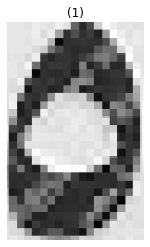

5


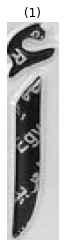

alf


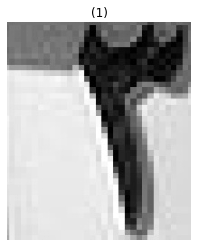

6


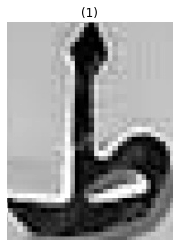

tah


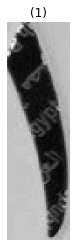

1


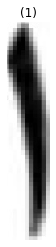

1


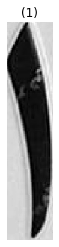

1


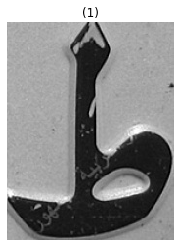

tah


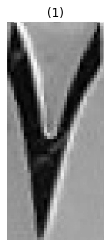

7


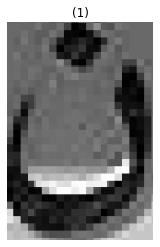

non


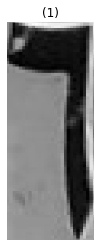

6


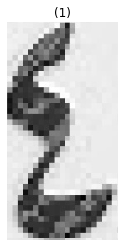

4


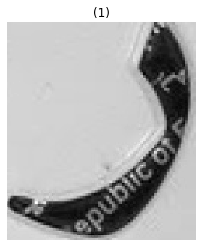

reh


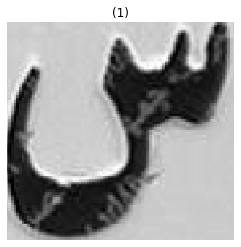

sen


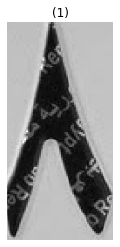

8


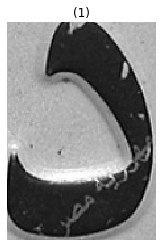

dal


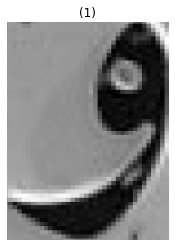

waw


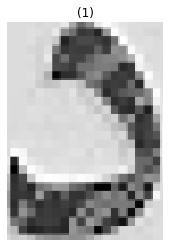

dal


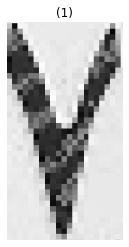

7


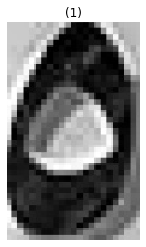

5


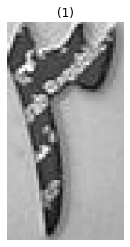

3


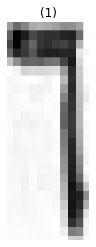

6


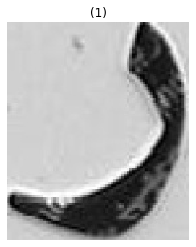

reh


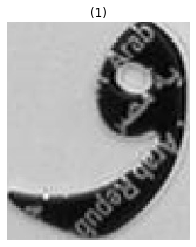

waw


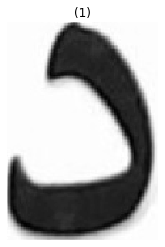

dal


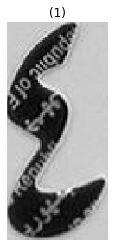

4


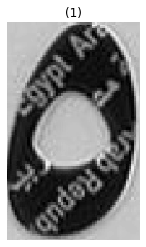

5


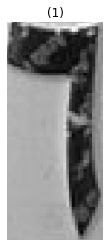

6


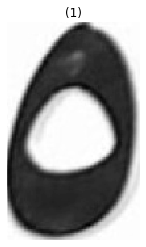

5


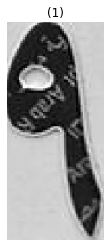

9


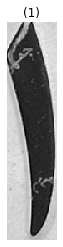

1


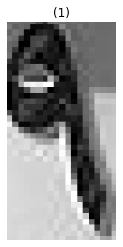

9


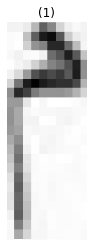

mim


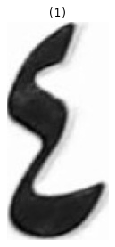

4


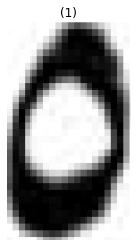

5


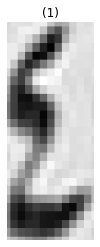

4


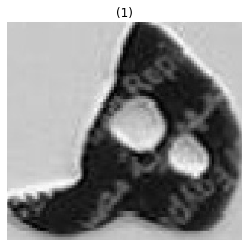

heh


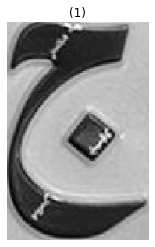

gem


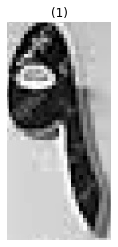

9


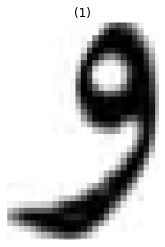

waw


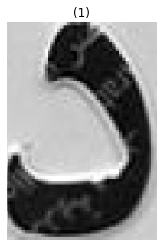

dal


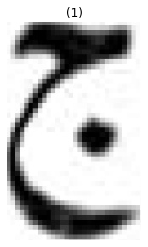

gem


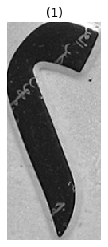

2


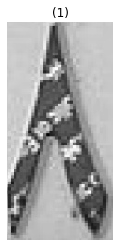

8


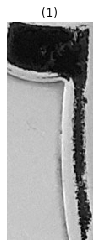

6


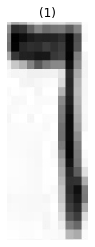

6


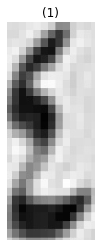

4


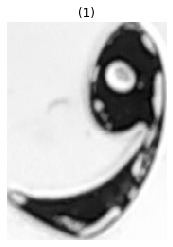

waw


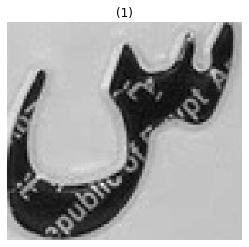

sen


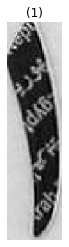

1


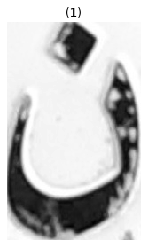

non


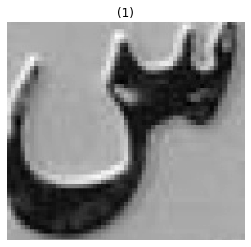

sen


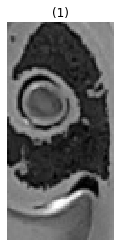

6


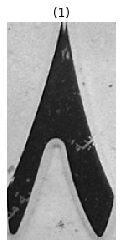

8


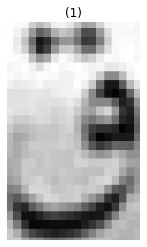

kaf


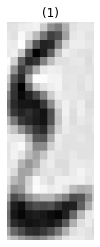

4


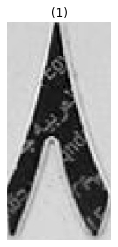

8


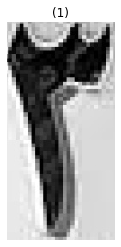

3


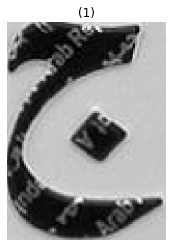

gem


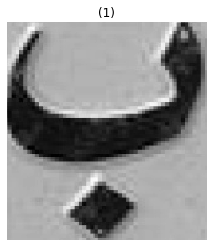

bih


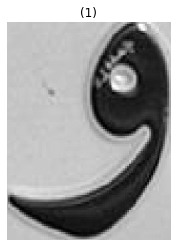

waw


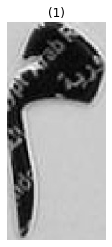

mim


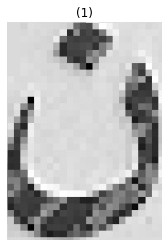

non


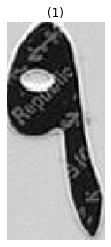

9


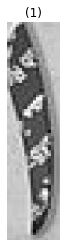

1


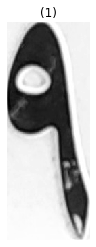

9


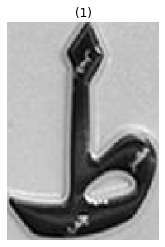

tah


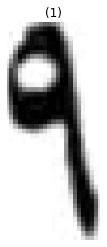

9


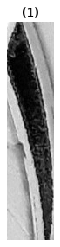

9


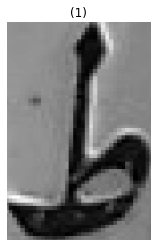

tah


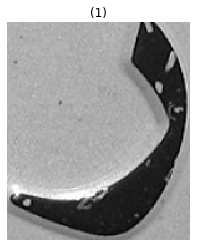

reh


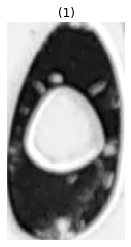

5


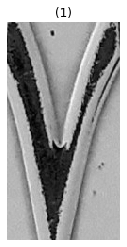

7


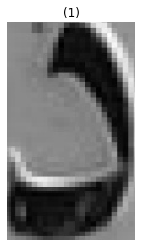

dal


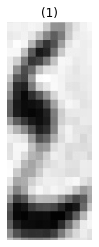

4


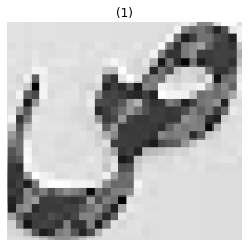

sad


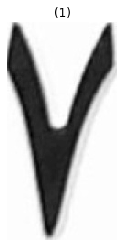

7


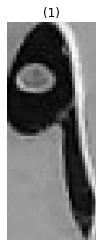

9


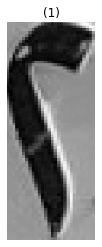

2


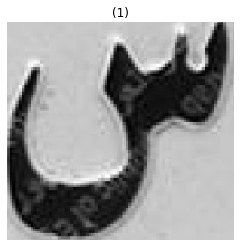

sen


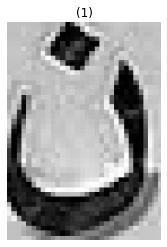

non


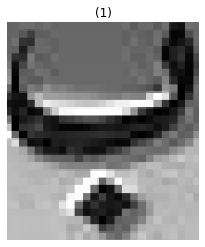

bih


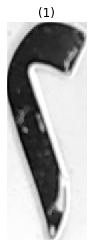

2


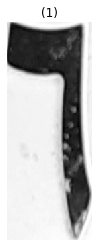

6


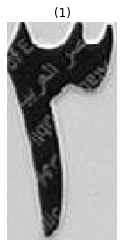

3


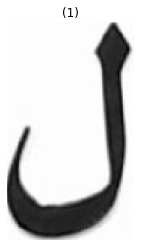

lam


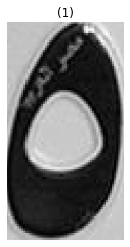

5


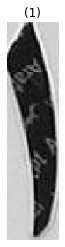

1


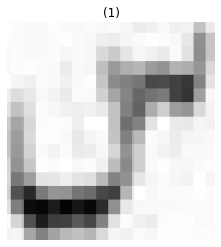

sen


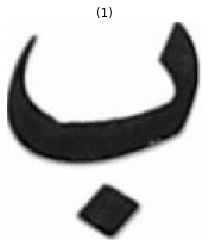

bih


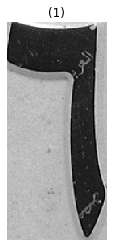

6


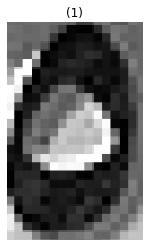

5


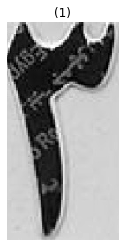

3


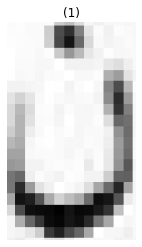

non


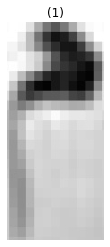

mim


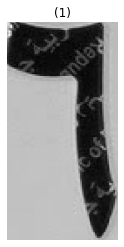

6


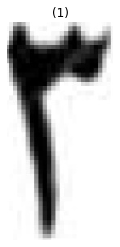

3


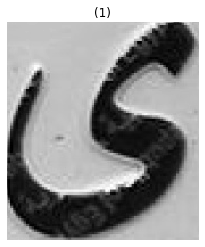

yeh


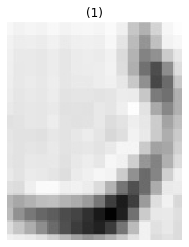

reh


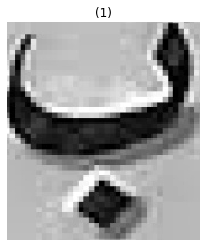

bih


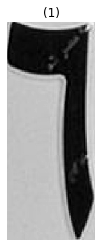

6


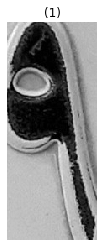

9


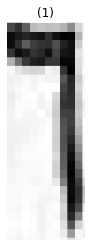

6


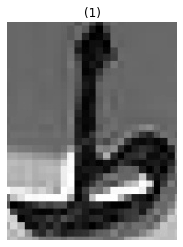

tah


In [53]:

width = 120
height = 120
for i in os.listdir('jimjimOut/'):
    Unk_char = character('Unk','jimjimOut/' + i)
    Unk_char.corr, Unk_char.col_sum = char_calculations(Unk_char.template, height, width)
    r = 500000000000
    curr_r = 500000000000
    
    for j in database_characters:
        curr_r = similarity = getSimilarity(Unk_char.template,j.template)
#         curr_r = cal_corr(Unk_char.corr, j.corr, Unk_char.col_sum, j.col_sum)
        if curr_r < r:
            Unk_char.char = j.char
            r = curr_r
    show_images([Unk_char.template])        
    print(Unk_char.char)
